In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from collections import Counter

In [37]:
df = pd.read_csv("청년정책목록_전체_매핑완료.csv", encoding="utf-8")

총 정책대분류명 항목 수: 3992
고유한 정책대분류명 수: 5

=== 정책대분류명 빈도 ===
일자리: 1703회
복지문화: 877회
교육: 546회
주거: 439회
참여권리: 427회


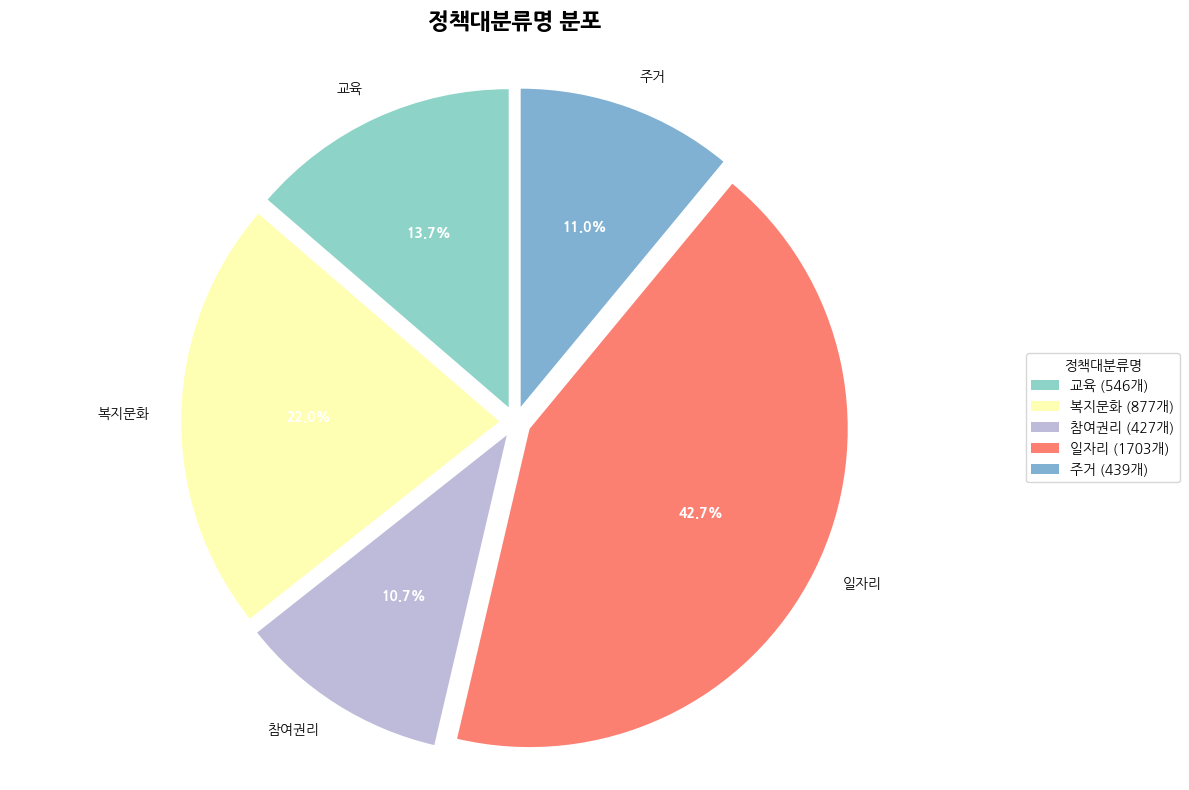


=== 상세 통계 정보 ===
전체 정책 수: 3992개
교육: 546개 (13.7%)
복지문화: 877개 (22.0%)
참여권리: 427개 (10.7%)
일자리: 1703개 (42.7%)
주거: 439개 (11.0%)


In [52]:
# 정책대분류명 데이터를 쉼표로 분리하여 카운트
from collections import Counter
import matplotlib.pyplot as plt

# 정책대분류명에서 쉼표로 분리된 모든 항목 추출
all_main_categories = []
for categories in df['정책대분류명'].dropna():
    # 쉼표로 분리하고 앞뒤 공백 제거
    split_categories = [cat.strip() for cat in str(categories).split(',')]
    all_main_categories.extend(split_categories)

# 카운트
main_category_counts = Counter(all_main_categories)

# 결과 출력
print(f"총 정책대분류명 항목 수: {len(all_main_categories)}")
print(f"고유한 정책대분류명 수: {len(main_category_counts)}")
print("\n=== 정책대분류명 빈도 ===")
for category, count in main_category_counts.most_common():
    print(f"{category}: {count}회")

# 원 차트를 위한 데이터 준비
categories = list(main_category_counts.keys())
counts = list(main_category_counts.values())
total = sum(counts)

# 비율이 작은 항목들은 '기타'로 묶기 (5% 미만)
threshold = total * 0.05
filtered_categories = []
filtered_counts = []
other_count = 0

for category, count in zip(categories, counts):
    if count >= threshold:
        filtered_categories.append(category)
        filtered_counts.append(count)
    else:
        other_count += count

if other_count > 0:
    filtered_categories.append('기타')
    filtered_counts.append(other_count)

# 원 차트 시각화
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(range(len(filtered_categories)))

# 원 차트 생성
wedges, texts, autotexts = plt.pie(filtered_counts, 
                                  labels=filtered_categories,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=colors,
                                  explode=[0.05] * len(filtered_categories))  # 모든 조각을 약간씩 분리

# 제목 및 스타일 설정
plt.title('정책대분류명 분포', fontsize=16, fontweight='bold', pad=20)

# 범례 추가
plt.legend(wedges, [f'{cat} ({count}개)' for cat, count in zip(filtered_categories, filtered_counts)],
          title="정책대분류명",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# 텍스트 스타일 개선
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.axis('equal')  # 원이 타원이 되지 않도록
plt.tight_layout()
plt.show()

# 상세 통계 정보
print(f"\n=== 상세 통계 정보 ===")
print(f"전체 정책 수: {total}개")
for category, count in zip(filtered_categories, filtered_counts):
    percentage = (count / total) * 100
    print(f"{category}: {count}개 ({percentage:.1f}%)")

In [38]:
description = ['정책명', '정책설명내용', '정책지원내용']

# 청년교육정책 EDA

In [25]:
# '정책대분류명'이 '교육'이 들어간 데이터 필터링
education_df = df[df['정책대분류명'].str.contains('교육', na=False)]
print(f"전체 데이터 수: {len(df)}")
print(f"교육 관련 정책 수: {len(education_df)}")
print(f"교육 관련 정책 비율: {len(education_df)/len(df)*100:.2f}%")

전체 데이터 수: 3458
교육 관련 정책 수: 546
교육 관련 정책 비율: 15.79%


## 정책제공방법코드

<Axes: title={'center': '교육 관련 정책 제공 방법 코드 분포'}, xlabel='정책제공방법코드'>

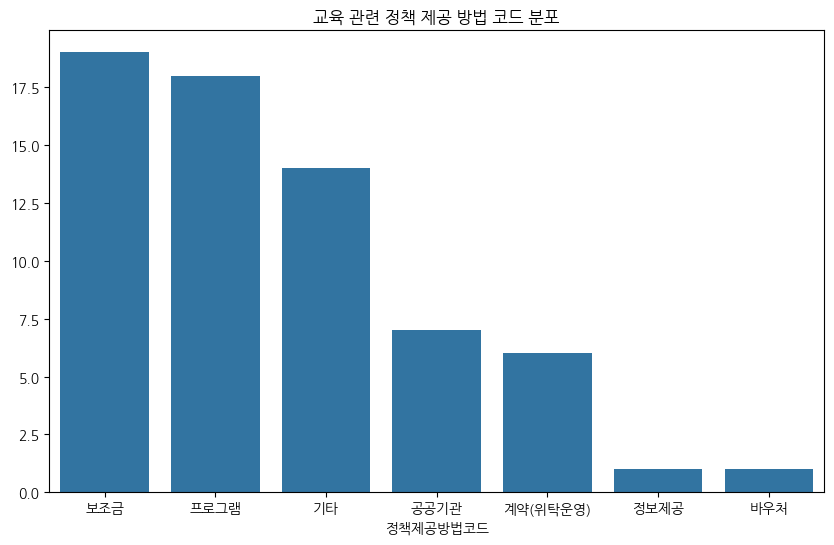

In [36]:
plt.figure(figsize=(10, 6))
plt.title('교육 관련 정책 제공 방법 코드 분포')
sns.barplot(
    x=education_df['정책제공방법코드'].value_counts().index,
    y=education_df['정책제공방법코드'].value_counts().values
)

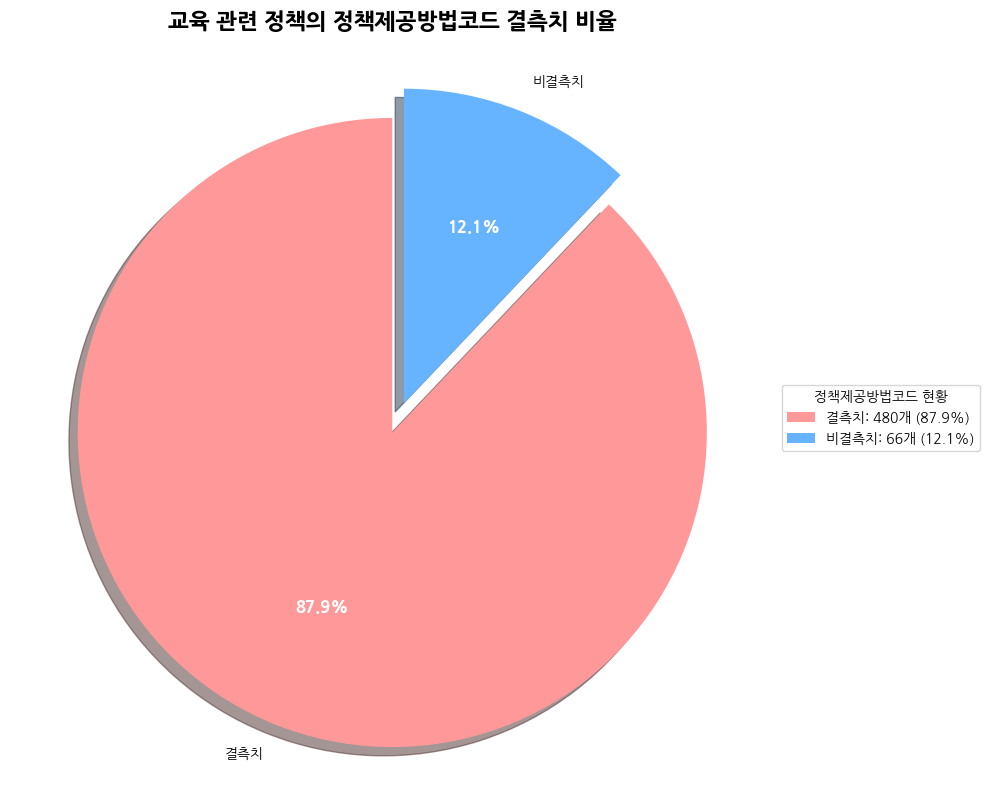

=== 교육 관련 정책의 정책제공방법코드 결측치 현황 ===
전체 교육 정책 수: 546개
결측치: 480개 (87.9%)
비결측치: 66개 (12.1%)


In [66]:
# education_df['정책제공방법코드']의 결측치 비율을 원 그래프로 시각화
import matplotlib.pyplot as plt

# 결측치와 비결측치 개수 계산
missing_count = education_df['정책제공방법코드'].isnull().sum()
non_missing_count = education_df['정책제공방법코드'].notnull().sum()
total_count = len(education_df)

# 비율 계산
missing_ratio = (missing_count / total_count) * 100
non_missing_ratio = (non_missing_count / total_count) * 100

# 데이터 준비
labels = ['결측치', '비결측치']
sizes = [missing_count, non_missing_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # 결측치 부분을 약간 분리

# 원 그래프 생성
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sizes, 
                                  labels=labels,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  explode=explode,
                                  shadow=True)

# 제목 설정
plt.title('교육 관련 정책의 정책제공방법코드 결측치 비율', 
          fontsize=16, fontweight='bold', pad=20)

# 텍스트 스타일 개선
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# 범례 추가
plt.legend(wedges, [f'{label}: {count}개 ({ratio:.1f}%)' 
                   for label, count, ratio in zip(labels, sizes, [missing_ratio, non_missing_ratio])],
          title="정책제공방법코드 현황",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

# 상세 정보 출력
print(f"=== 교육 관련 정책의 정책제공방법코드 결측치 현황 ===")
print(f"전체 교육 정책 수: {total_count}개")
print(f"결측치: {missing_count}개 ({missing_ratio:.1f}%)")
print(f"비결측치: {non_missing_count}개 ({non_missing_ratio:.1f}%)")

### 결론: 정책제공방법코드 재정의 필요
결측치도 많고 분류가 명확하지 않음.

- 금전지원
  - 대상: 초중고 학생, 대학생, 대학원생, 취약 계층
  1. 장학금
  2. 생활비
  3. 연구활동비
  4. 학자금 대출
  5. 교육비(어학, 기사 시험 응시료, 교육 바우처)
- 프로그램
  1. 전문인력 양성
  2. 맞춤 상담, 컨설팅



### 1. 보조금과 바우처 방식은 어떤 차이점이 있는가?

- 보조금
  1. 학자금 대출, 대출이자 지원
  2. 학자금 지원(장학금)
  3. 대학원생 연구활동비 지원
  4. 학생 생활비 지원
  5. 어학, 기사 시험 응시료 지원

- 바우처
  1. 지정된 온라인, 오프라인 교육기관에서 사용할 수 있음
  2. 평생교육바우처 페이지(https://www.lllcard.kr)

- 대상 분류
    1. 초중고생
    2. 대학생
    3. 대학원생(석박사)

보조금과 바우처는 합쳐도 되지 않을까요?

In [43]:
# 보조금과 바우처 방식은 어떤 차이점이 있는가?
education_df[education_df['정책제공방법코드'] == '보조금'][description]

,정책명,정책설명내용,정책지원내용
11,부산 학자금 대출이자 지원,한국장학재단의 학자금대출을 받은 부산시 소재 대학교 대학생·대학원생 및 대학교 졸업...,○ 지원내용 : 한국장학재단 학자금대출의 '24년 7월 ~ '25년 6월까지 발생이...
12,부산지역인재 장학금 및 취업장려금,"부산지역 대학의 IT 및 상경 분야 대학생 3,4학년(전문대학 2학년) 대상으로 생...","○ 지원대상 : 부산지역 대학의 IT 및 상경 분야 대학생 3,4학년(전문대학 2학..."
36,"대학생 지역인재육성지원금 지원(1,2학기)",지역인재 양성을 위해 우수학생 및 예체능 등 다양한 분야의 인재를 발굴 지원하여 학...,- 사업기간 : 2025년 1월 ~ 12월 (연례반복)\n- 사업대상 : 2025년...
166,인재육성 장학금 지원,지역사회 발전에 기여할 인재 발굴 및 육성,"분야별 장학금 지급(성적, 지역봉사, 지역정착, 외국인 등)"
167,전라남도 해외유학생 지원,해외 박사 유학비 지원,1인당 최대 1억원(2년 분할)
168,대학생 무한도전 프로젝트(해외),"전남의 대학생들이 미래 산업을 이해하고, 국제사회에서 필요한 역량을 배양할 수 있도...",팀당 최대 50백만원 활동비 지원
169,연구인재 역량강화 프로젝트,수도권에 비해 다양한 연구경험이 적은 지역 대학원생을 위하여 외부 연구기관과의 공동...,연구활동비 지원
214,청년 배움 지원,"청년 역량강화를 위해 취·창업 및 자기개발 비용의 일부를 지원하여, 청년의 경제적 ...","청년 취․창업 및 능력개발을 위한 자기개발 지출비용의 80%, 1인당 최대 20만원..."
236,청년 학자금 대출 부실채무자 신용회복 지원,"한국장학재단 학자금대출 장기 연체로 한국신용정보원에 유의자로 등록되어, 취업 및 경...",❍ (사업대상) 본인 또는 직계존속이 계속하여 1년 이상 도내에 주소를 둔 만39...
237,대학생 학자금 이자 지원,장기적인 경제침체 및 취업난으로 학자금 대출에 어려움을 겪고 있는 대학생들에게 학자...,❍ (기간) 2025. 3. ~ 2026. 5.\n - 상반기(1월~6월분) ...


In [42]:
education_df[education_df['정책제공방법코드'] == '바우처'].head(5)[description]

,정책명,정책설명내용,정책지원내용
359,평생교육 바우처 운영,경제적 어려움을 겪고 있는 저소득층 청년들에게 평생교육바우처를 지원하여 다양한 분야...,1인당 1회 35만원 지원(연 최대 70만원)


### 2. 정보제공은 어떤 정보를 제공하는가?

- 정보제공
  1. 전문인력 양성(교육 프로그램)

In [45]:
education_df[education_df['정책제공방법코드'] == '정보제공'][description]

,정책명,정책설명내용,정책지원내용
336,화합물반도체 전문인력 양성,기업 맞춤형 화합물반도체 전문인력 양성을 지원합니다.,화합물반도체 전문인력 양성 및 기술지원\n - 설계‧후공정 등 실무인력 교육 ...


### 3. 프로그램과 정보제공의 차이점이 있는가?

- 프로그램
  1. 기술인력양성(교육 프로그램)
  2. 맞춤 상담

정보제공과 유사


In [46]:
education_df[education_df['정책제공방법코드'] == '프로그램'][description]

,정책명,정책설명내용,정책지원내용
58,경기도 반도체 산업 전문인력 양성사업,"반도체 중소, 중견기업 수요중심 실무형 기술인력 양성","○ (공유대학) 반도체 장비, 소재 및 전문학사 분야 전문인력 양성 \n○ (교육인..."
111,의약품 규제업무 전문가 양성교육,의약품 안전관리 전주기의 법적·과학적 규제기준에 대한 종합적 지식을 갖춘 '의약품 ...,"제약업계 취업희망자 및 재직자 대상 의약품 규제업무 전문가 양성교육, 현장실무실습 ..."
152,『찾아가는 전세사기 피해예방』 교육 및 상담,전세사기에 노출되기 쉬운 청년 및 사회초년생을 대상으로 전세사기 피해 예방 및 피해...,"- 전세계약 구조, 단계별 유의사항 & 전세사기 피해사례 및 지원 정책\n- 전세사..."
163,AI 보안관제 전문인력 양성(5기) 교육,사이버보안 분야(보안관제) 취업을 희망하는 청년 구직자 대상 정보보호 기초 및 보안...,"학업장려금 지급, 우수 수료생 해외연수, 교육과정 수료생 대상 취업지원(채용형 인턴..."
164,K-Shield 주니어 14기 정규과정,사이버보안 분야 입문 및 진출을 희망하는 청년 대상 정보보호 기초 교육(80시간 이...,"학업장려금 지급, 우수 수료생 해외연수, 교육과정 수료생 대상 취업지원(인턴십 연계 등)"
226,산학 프로젝트 Lab 지원,대학의 프로젝트 Lab과 기업을 연계한 맞춤형 인재 양성,"❍ (대상) 오송바이오 캠퍼스 이전대학(충북대, 청주대, 충북도립대) 및 바이오 ..."
228,바이오기업 인력양성 일학습병행 사업,기업수요의 부응한 현장맞춤형 교육프로그램 운영을 통해 재직자 역량강화 및 실무형 바...,"❍ (대상) 입사 1년 미만 재직자\n❍ (규모) 40개 기업, 학습근로자 220명..."
231,ICT 이노베이션스퀘어 운영,디지털 전환 시대에 요구되는 AI융합 실무형 ICT 인재양성,"❍ (사업대상) 대학생, 취･창업 준비생 등 충북도민\n❍ (사업내용) ICT 이노..."
232,충북 메타버스지원센터 운영 사업,"콘텐츠 제작, 인프라 구축, 사업화 지원 등 가상융합기술 육성지원을 통한 디지털콘텐...","❍ (사업대상) XR·메타버스 관련 기업, 학생, 예비창업자 등\n ❍ (사업내용..."
234,소프트웨어(SW) 미래채움 사업,지역간 SW교육 격차 해소 및 SW역량 강화를 위하여 지역 SW강사 육성 및 교육 ...,"❍ (사업대상) \n - (강사 양성) 경력단절여성, 청년 미취업자, 퇴직자\n..."


### 4. 공공기관과 계약(위탁운영) 구분은 다른 컨텐츠 제공을 하기 때문인가?

- 공공기관
  1. 장학금
  2. 교육 프로그램

- 계약(위탁운영)
  1. 전문인력양성

차이가 없는거 같습니다

In [47]:
education_df[education_df['정책제공방법코드'] == '공공기관'][description]

,정책명,정책설명내용,정책지원내용
119,서울교환학생장학금,해외 대학에서 학문과 문화를 경험하며 다양한 생각과 가치관을 존중하는 포용력을 지닌...,□ 장학금\n ○ 아시아 : 400만원\n ○ 비아시아 : 550만원\n\n□ ...
120,독립유공자후손장학금,ㅇ 독립유공자 예우와 학업에 대한 경제적 부담 완화를 위해독립유공자 증손 이하 후손...,ㅇ (사업 근거)\n - 서울특별시 장학재단 설립 및 운영에 관한 조례\n ...
121,서울희망 공익인재 장학금,"대학생에게 공동으로 창의적인 사회적 대안을 탐구하는 기회를 제공하여, 사회에 긍정적...",활동내용 : 공익 감수성 제고를 위한 사회문제해결 공익 프로젝트 추진\n활동기간 :...
122,서울희망대학진로장학금,"ㅇ 저소득 대학생의 생계형 활동 참여시간을 줄이고, 학업과 진로 탐색 개발에 집중...",ㅇ (사업 근거) 서울특별시 장학재단 설립 및 운영에 관한 조례\n ㅇ (추진 경...
123,"서울희망직업전문학교장학금 (前, 등록금 지원 장학사업)",ㅇ 경제적 어려움으로 학업에 어려움을 겪지 않도록 저소득 가정 직업전문학교생의 등록...,ㅇ (사업 근거) 서울특별시 장학재단 설립 및 운영에 관한 조례\n ㅇ (추진 경...
149,예비청년 대상 발명교육 지원,발명/특허 특성화고 지원,"직업계고 발명/특허 교육지원 학교를 지정하고 발명/지식재산 관련 정규교과목 운영, ..."
150,체계적인 지식재산 인재 및 리더 양성,지식재산 전문인력 양성 중점대학 운영 및 산학협동현 캠퍼스특허유니버시아드 운영,"ㅇ 권역별 9개의 지식재산 중점대학을 지정하여 지식재산 교육을 강화하고, 대학특성/..."


In [48]:
education_df[education_df['정책제공방법코드'] == '계약(위탁운영)'][description]

,정책명,정책설명내용,정책지원내용
118,청년인생설계학교 운영,ㅇ 인생전환기 청년들에게 주체적인 인생설계 기회 제공\nㅇ 자기이해 및 진로탐색 프...,ㅇ (사업 근거)\n -「청년기본법」제19조(청년 능력개발 지원)\n -「...
189,마이스터대 지원,고숙련 전문기술인재 양성을 위해 직무 중심 고도화된 교육과정을 운영하는 '마이스터대...,○ (목적) 고숙련 전문기술인재로의 성장경로를 제시하고 체계적·장기적 역량개발을 지...
431,청년해기인력 공급기반 강화,"미취업 청년해기사를 대상으로, 산.학 협력을 통한 선사 맞춤형 특화교육 및 취업지원...","선사 실수요를 반영한 실무특화 교육 제공, \n승선 동기부여 및 인식개선을 위한 해..."
454,청년임업인 특성화교육,"청년임업인 네트워킹을 통한 학습그룹 발굴, 그룹별 수요맞춤형 임산물 재배기술 교육,...",&lt; 청년임업인 특성화 교육 &gt;\n1. 사업목적 : 청년층을 대상으로 현장...
465,ICT기반 수산전문인력 양성,4차 산업혁명기술분야 전문성과 수산분야 소양을 함께 겸비한 \n현장밀착형 전문인력 양성,R&amp;D프로젝트 기반 인력육성 프로그램 지원
480,제대군인 사이버교육,- 제대군인 특성에 맞는 시장 친화적이며 취창업과 연계한 차별화된 직업교육 확대\n...,1인당 월 3개 (연 12개) 과목 사이버교육 지원\n교재비 50% 지원(1인당 6...


### 5. 기타 데이터는 어떤 것들이 있는가?

- 기타
  1. 장학금
  2. 취업연계프로그램
  3. 면접 컨설팅
  4. 교육 프로그램
  5. 이자 지원
  6. 특정 분야 인재 양성



In [49]:
education_df[education_df['정책제공방법코드'] == '기타'][description]

,정책명,정책설명내용,정책지원내용
0,주거안정장학금,원거리 대학 진학으로 인해 주거 관련 비용 부담이 큰 저소득 대학생을 대상으로 주거...,"□ 지원금액: 월 최대 20만 원\n※ 단, 방학 중(7~8월, 1~2월)에는 지원..."
78,규제과학 인재양성 및 글로벌 협력연구,"식의약 규제과학 분야 석박사 (비)학위과정, 취업 연계 프로그램, 현장체험 등 운영...","전일제, 부분제 석박사 학위과정 지원 / 식의약 글로벌 아카데미 등 장단기 현장체험..."
99,AI면접 및 역량검사 체험 지원,청년 취업 역량 강화 지원,"- AI면접 및 역량검사 체험 이용\n- 개인별 결과 분석 및 녹화영상 제공, 면접..."
181,2025년 순창군 대학 진학 축하금 지원,순창에 주소를 두고 고등학교를 졸업 또는 고졸 검정고시 합격 후 3년이내 대학교에 ...,지원대상 : 관내·관외고등학교를 졸업 또는 고졸 검정고시 합격 후 3년이내 대학교...
215,전입대학생 인재양성 장학금 지급,청년 인구 유입을 위하여 전입 대학생 장학금을 지원하여 학생들의 경제적 부담을 경감...,군 이외의 지역에 주민등록을 두고 있다가 군에 전입한 중원대학교 재학생에게 전입지원...
268,광주 인공지능사관학교 운영,산업계 수요를 반영한 양질의 맞춤형 교육을 지원하여 기업이 원하는 최적의 AI 실무...,"\n- 교육과정 : 온라인 교육(선발과정) + 본 교육(핵심 : AI 빌드업, 실전..."
270,GCC 사관학교 운영,"실감 콘텐츠, 게임, 애니메이션, 웹툰 등 글로벌 콘텐츠 인재 양성\n\n",\n- 교육비 전액 무료- 현장 전문가(현업 종사자)를 통한 실무 특화 교육 제공\...
323,직업심리검사,"개인의 능력과 흥미, 성격 등 다양한 심리적 특성을 측정하여 자기 이해를 돕고 적합...","□ 다양한 직업심리검사를 통해 개인의 능력과 흥미, 성격 등의 심리적인 특성들이 각..."
344,대학생 학자금 대출 이자 지원,대학생 학자금의 대출이자를 지원하여 경제적 이유로 교육을 받기 힘든 대학생들에게 균...,사업내용: 한국장학재단을 통하여 학자금을 대출받은 경우 대출이자 지원
353,청년 취업 준비 지원사업,청년 미취업자의 어학 및 자격증 응시료&middot;교육비 지원을 통한 취업 경쟁력 확보,"어학, 한국사 및 취업 관련 자격증 응시료 및 온&middot;오프라인 교육비 지원..."


### 6. 결측치 데이터는 비결측치 데이터와 다른 컨텐츠를 구성하고 있는가?

- 결측치 데이터
  1. 전문인력 양성
  2. 교육 바우처


In [68]:
education_df[education_df['정책제공방법코드'].isna()][description].head(10)

,정책명,정책설명내용,정책지원내용
587,청년취업사관학교 은평캠퍼스 <산업 실무 프로젝트 기반 LLM 서비스 기획 과정> 참...,청년취업사관학교 은평캠퍼스 <산업 실무 프로젝트 기반 LLM 서비스 기획 과정> 참...,○ 기간 및 일정\n- 접수기간 : ~ 2024-11-18(월) 23:59까지\n-...
590,서울청년센터 양천 <양천 청년 트레이닝> 참여자 모집,"전문 트레이너와 함께 맨몸교정, 체형교정, 레크레이션, 단체게임 등을 즐길 수 있는...","○ 내용: 전문 트레이너와 함께 맨몸운동, 체형교정 등 다양한 운동을 레크레이션으..."
593,청년 귀농·귀촌 교육생 모집 공고,청년 귀농·귀촌 교육생 모집 공고,○ 일 시 : 2024.11.25.(월) ~ 28.(목) 10:00 ~ 16:00...
594,2024년 경남 김해시 장애인 평생교육이용권(우수 이용자),「2024년 장애인 평생교육이용권 지원」사업의 우수 이용자 격려를 위한 이용권 포인...,■ 지원금액 : 35만원 재충전\n※중복수혜 불가: ’24년 평생교육이용권(바우처)...
597,2024년 하반기 사회적기업 전환 아카데미 교육생 모집,사회적기업 전환을 준비하는 기업 및 창업예정자에게 다음과 같이 아카데미를 진행하고자...,2024년 하반기 사회적기업 전환 아카데미2024.12.04.(수) ~12.05.(...
600,로컬 카페 창업가 육성 사업 「흑백파티쉐」 참여자 모집,-,-
606,2024년 서울가족학교 '청소년기부모교실' 프로그램 - 자녀 디지털기기 사용지도(행...,"디지털 기기에 의존하는 청소년, 스마트폰에 의존하는 청소년, 어떻게 도와야 할까요?",- 일시 : 2024년 11월 23일(토) 10~12시\n- 장소 : 금천구가족센터...
607,서울 노원구 장애인 전동보장구 운전연습장 교육생 모집,전동보장구 운전교육을 통해 장애인과 이동약자가 안전하게 보장구를 이용할 수 있도록 함.,"교육일시 : 24년 11월부터 매주 화요일 14:00 ~ 16:00 (이론 50분,..."
611,경기AI캠퍼스 - Microsoft Copilot Seminar 신청자 모집,"Microsoft Copilot의 개념과 기능을 학습하고, 실무에 응용가능한 문서 ...",- 수강료 : 전액 무료\n- 진행방법 : 오프라인 교육\n- 교육일정 : 2024...
612,서울시복지재단 <가족돌봄청년 성장프로그램> 신청 안내,가족돌봄청년을 위한 프로그램을 진행합니다.,○ 진행내용: ChatGPT가 나 대신 일하게 하기\n○ 프로그램 구성\n업무에 도...


## 신청기간

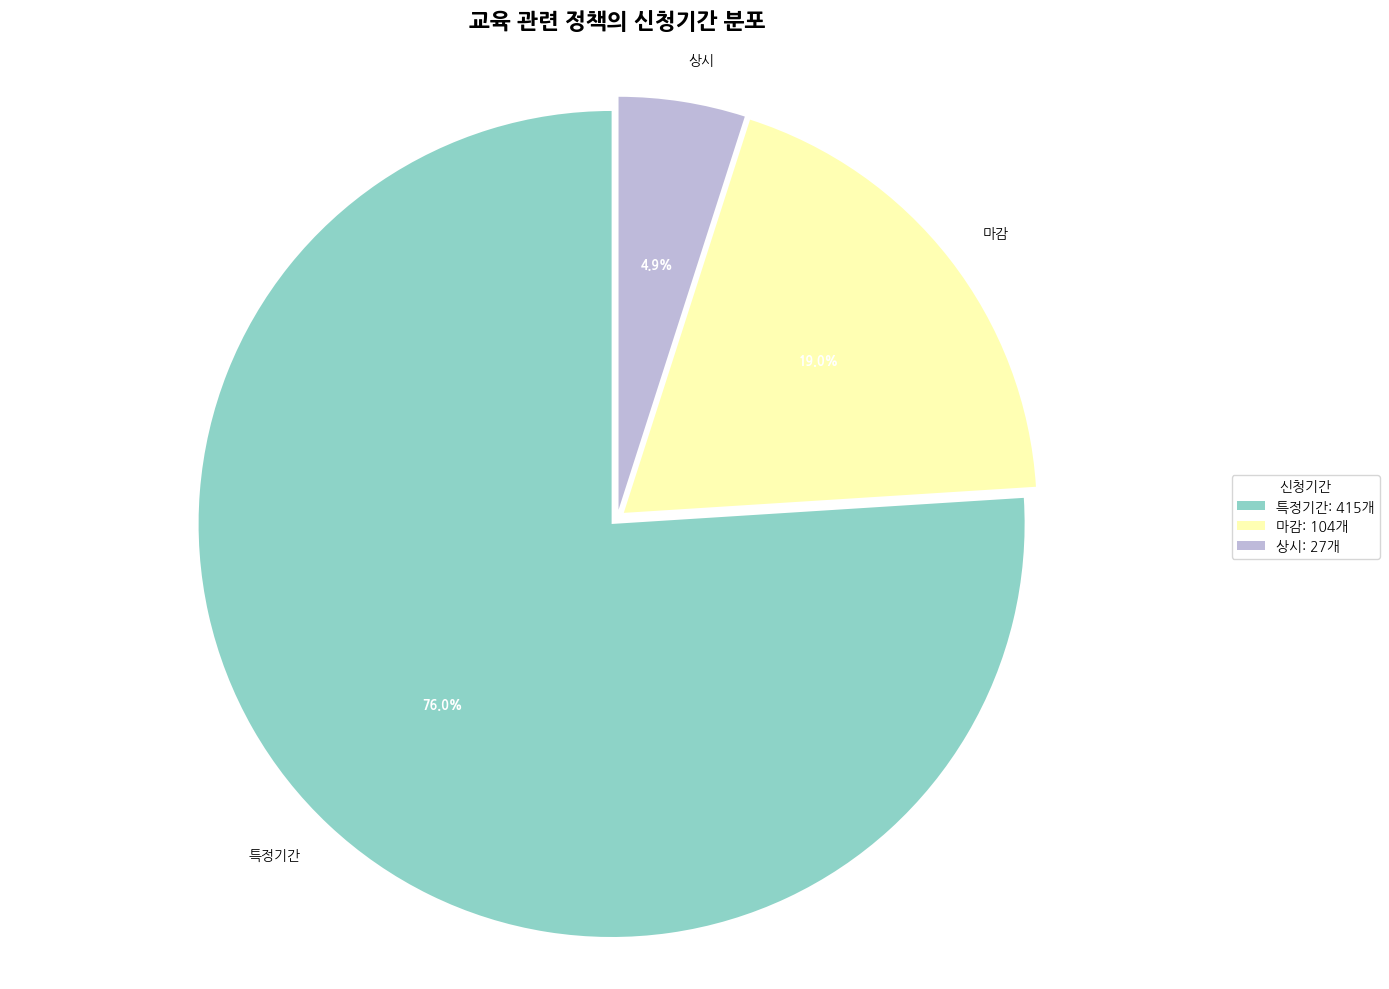

=== 교육 관련 정책의 신청기간 현황 ===
전체 교육 정책 수: 546개
고유한 신청기간 유형: 3개

=== 신청기간별 상세 현황 ===
특정기간: 415개 (76.0%)
마감: 104개 (19.0%)
상시: 27개 (4.9%)

결측치: 0개 (0.0%)


In [73]:
# education_df['신청기간'] 데이터 카운트 원 그래프로 시각화
import matplotlib.pyplot as plt

# 신청기간 데이터 카운트
period_counts = education_df['신청기간구분코드'].value_counts()

# 상위 항목들과 기타로 분류 (전체의 5% 미만은 기타로 묶기)
total_count = len(education_df)
threshold = total_count * 0.03  # 3% 미만은 기타로 묶기

# 필터링된 데이터 준비
filtered_periods = []
filtered_counts = []
other_count = 0

for period, count in period_counts.items():
    if count >= threshold:
        filtered_periods.append(period)
        filtered_counts.append(count)
    else:
        other_count += count

if other_count > 0:
    filtered_periods.append('기타')
    filtered_counts.append(other_count)

# 원 그래프 시각화
plt.figure(figsize=(14, 10))
colors = plt.cm.Set3(range(len(filtered_periods)))

# 원 차트 생성
wedges, texts, autotexts = plt.pie(filtered_counts, 
                                  labels=filtered_periods,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=colors,
                                  explode=[0.02] * len(filtered_periods))  # 모든 조각을 약간씩 분리

# 제목 설정
plt.title('교육 관련 정책의 신청기간 분포', fontsize=16, fontweight='bold', pad=20)

# 텍스트 스타일 개선
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# 범례 추가
plt.legend(wedges, [f'{period}: {count}개' for period, count in zip(filtered_periods, filtered_counts)],
          title="신청기간",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.axis('equal')
plt.tight_layout()
plt.show()

# 상세 통계 정보
print(f"=== 교육 관련 정책의 신청기간 현황 ===")
print(f"전체 교육 정책 수: {total_count}개")
print(f"고유한 신청기간 유형: {len(period_counts)}개")
print("\n=== 신청기간별 상세 현황 ===")
for period, count in zip(filtered_periods, filtered_counts):
    percentage = (count / total_count) * 100
    print(f"{period}: {count}개 ({percentage:.1f}%)")

# 결측치 확인
missing_count = education_df['신청기간구분코드'].isnull().sum()
print(f"\n결측치: {missing_count}개 ({missing_count/total_count*100:.1f}%)")

### 1. 신청기간이 특정기간인 경우 아직 정책이 진행 중인 것인가?

- URL 접속 후 확인 결과 마감된 정책 존재

In [79]:
education_df[education_df['신청기간구분코드'] == '특정기간'][description + ['신청URL주소']]

,정책명,정책설명내용,정책지원내용,신청URL주소
0,주거안정장학금,원거리 대학 진학으로 인해 주거 관련 비용 부담이 큰 저소득 대학생을 대상으로 주거...,"□ 지원금액: 월 최대 20만 원\n※ 단, 방학 중(7~8월, 1~2월)에는 지원...",https://www.kosaf.go.kr/ko/scholar.do?pg=schol...
11,부산 학자금 대출이자 지원,한국장학재단의 학자금대출을 받은 부산시 소재 대학교 대학생·대학원생 및 대학교 졸업...,○ 지원내용 : 한국장학재단 학자금대출의 '24년 7월 ~ '25년 6월까지 발생이...,NaN
12,부산지역인재 장학금 및 취업장려금,"부산지역 대학의 IT 및 상경 분야 대학생 3,4학년(전문대학 2학년) 대상으로 생...","○ 지원대상 : 부산지역 대학의 IT 및 상경 분야 대학생 3,4학년(전문대학 2학...",https://young.busan.go.kr/index.nm?menuCd=164
36,"대학생 지역인재육성지원금 지원(1,2학기)",지역인재 양성을 위해 우수학생 및 예체능 등 다양한 분야의 인재를 발굴 지원하여 학...,- 사업기간 : 2025년 1월 ~ 12월 (연례반복)\n- 사업대상 : 2025년...,NaN
99,AI면접 및 역량검사 체험 지원,청년 취업 역량 강화 지원,"- AI면접 및 역량검사 체험 이용\n- 개인별 결과 분석 및 녹화영상 제공, 면접...",https://www.wonju.go.kr/wjyouth/viewTnWjyouthP...
...,...,...,...,...
3415,2024 KOTRA 일본 온라인잡페어 봄,KOTRA 일본 지역 무역관 일본지역 봄 잡페어,참가기업: 정규직 혹은 1년이상 계약직으로 한국인재 채용예정인 일본전국 소재 기업,https://www.worldjob.or.kr/index.do
3418,청년농업인 경영관리 지원을 위한 장기컨설팅 대상자 모집,-,□ 경영진단을 통해 도출된 문제점 대응을 위한 컨설팅 지원청년 농업인 지원사업 참여...,https://www.gimhae.go.kr
3432,청년창업농 장학금,"대학 졸업 후, 영농 및 농림축산식품분야에 취·창업을 조건으로 장학금을 지원함",□ 등록금 전액 + 학업장려금 250만원(한 학기 1인 기준)\n ○ 장학금(등록금...,https://youth.rhof.or.kr/student/login.do
3438,2024년 구직지원금 지급,정읍시 사회초년생들의 생활 안정 기여를 위해 1인 1백만원 지원,1인 1백만원 지원,NaN


# 청년주거정책 EDA

In [55]:
# '정책대분류명'이 '교육'이 들어간 데이터 필터링
house_df = df[df['정책대분류명'].str.contains('주거', na=False)]
print(f"전체 데이터 수: {len(df)}")
print(f"주거 관련 정책 수: {len(house_df)}")
print(f"주거 관련 정책 비율: {len(house_df)/len(df)*100:.2f}%")

전체 데이터 수: 3458
주거 관련 정책 수: 439
주거 관련 정책 비율: 12.70%


## 정책제공방법코드

<Axes: title={'center': '주거 관련 정책 제공 방법 코드 분포'}, xlabel='정책제공방법코드'>

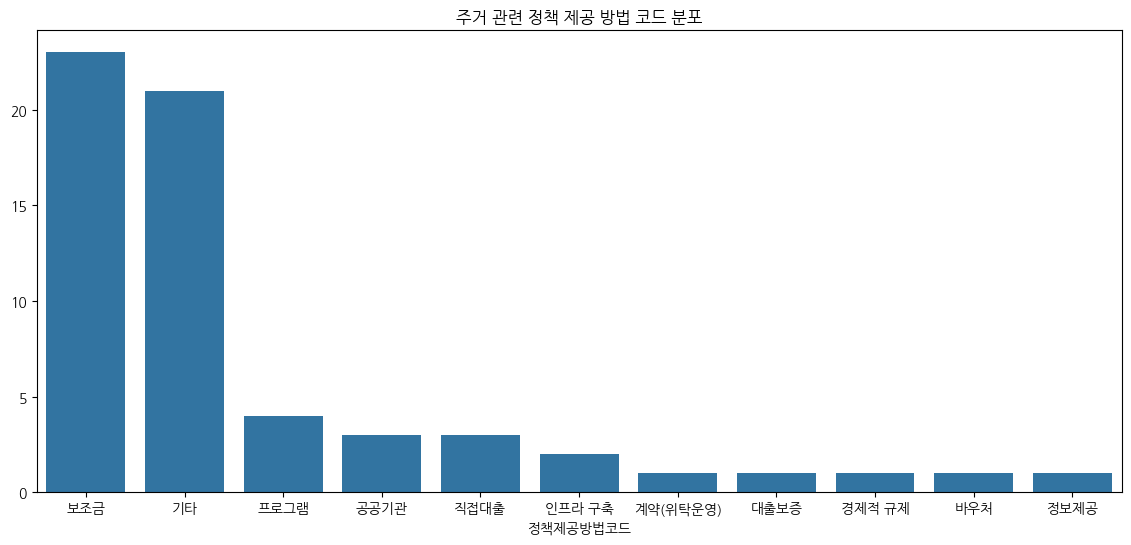

In [58]:
plt.figure(figsize=(14, 6))
plt.title('주거 관련 정책 제공 방법 코드 분포')
sns.barplot(
    x=house_df['정책제공방법코드'].value_counts().index,
    y=house_df['정책제공방법코드'].value_counts().values
)

### 1. 보조금은 어떤 종류의 지원을 하는가?

In [60]:
house_df[house_df['정책제공방법코드'] == '보조금'][description]

,정책명,정책설명내용,정책지원내용
33,부산 자립청년 주거 다 지원 사업,"자립청년을 대상으로 머물자리론 대출 이자, 중개보수, 주거생활비, 자립물품 구입비를 지원",□ 사업대상 : 신청일 현재 주민등록상 부산광역시에 거주하는 보호종료 5년 경과~...
34,부산청년 머물자리론,부산 청년 임차보증금 대출 및 대출이자 지원사업,□ 사업대상 : 신청일 현재 주민등록상 부산광역시에 거주하는 19~39세 무주택...
35,신혼부부 주거자금 대출이자 지원,결혼 초기 주거자금 지원을 통한 안정적인 가족 형성 및 인구감소 문제 극복,"신혼부부 가구 전·월세 대출금 이자 상환액 지원(대출잔액 1억원 한도 내, 최대 연..."
126,청년 부동산 중개보수 및 이사비 지원사업,주거비 부담이 높은 서울 청년의 주거 안전망 강화 추진,"최대 40만원 실비 지원(중개보수, 이사비) ※ 생애 1회\n"
127,전월세 안심계약 도움서비스 운영,ㅇ 내 집 찾기가 어려운 1인가구에게 전월세 계약상담 및 집보기 현장 동행 서비스를...,ㅇ 사업 근거\n - 서울시 사회적 가족도시 구현을 위한 1인가구 지원 기본조례...
128,청년 월세 지원,ㅇ 사회에 갓 진입한 청년층의 주거비 부담 완화를 통한 청년 주거 수준 향상으로 사...,"ㅇ (사업 근거)\n -「주거기본법」제15조(주거비 보조), 「청년기본법」제20..."
170,전남학숙 운영,광주 및 인근 지역 소재 대학교에 재학 중인 우리 도 출신 학생들의 숙식 편의제공 ...,대학(원)생 숙식 및 편의시설 제공
171,남도학숙 운영,수도권에 유학하는 우리 지역 출신 대학생들이 안전하고 편안한 환경에서 창의적이고 미...,대학(원)생 숙식 및 편의시설 제공
212,신혼부부 전세자금 대출이자 지원 사업,신혼부부 또는 예비부부의 신혼집 마련 비용 부담을 완화하여 주거복지 실현 및 저출산...,❍ 지원대상 : 2020년 이후「주택도시기금 신혼부부 전용 전세자금」신규 또는 추가...
221,음성군 청년월세 지원사업,청년들의 주거비 부담을 경감하고 경제적 자립과 사회진입 지원 강화,"생애 1회, 월 최대 15만원, 최대 12개월 임차료 지원"


- 보조금
  - 소득수준별 차등 지원, 지역 청년
  1. 전세, 월세, 대출, 대출이자 지원
  2. 중개보수, 이사비 지원
  3. 주거생활비, 자립물품 구입비를 지원
  5. 숙식, 편의시설 제공


### 2. 직접대출, 대출보증, 경제적 규제, 바우처는 보조금과 어떤 차이점이 있는가?

In [64]:
house_df[house_df['정책제공방법코드'].isin(['직접대출', '대출보증', '경제적 규제', '바우처'])][description + ['정책제공방법코드']]

,정책명,정책설명내용,정책지원내용,정책제공방법코드
22,청년 주택드림 디딤돌 대출,청년의 주거사다리 지원을 위해 청년 주택드림 통장으로 청약 당첨 시 주택구입자금을 대출,□ 대출금리 : 2.4% ~ 4.15%\n□ 대출한도 : 다음 중 작은 금액으로 산...,직접대출
225,신혼부부 주택자금 대출이자 지원,"신혼부부 주택자금 지원을 통해 청년들의 경제적 부담을 줄이고, 청년층 인구 유입을 유도",금융기관으로부터 받은 신혼부부 명의의 주택구입 또는 전세자금 목적의 대출이자 연 1...,대출보증
306,생활안정자금 융자사업,"생계곤란을 겪는 근로자 등에게 의료비, 혼례비, 장례비, 노부모부양비 등의 생계비를...","1. 융자종목 및 한도액\n - 의료비, 장례비 : 1,000만원\n - 혼례비 :...",직접대출
372,청년월세 특별지원(2차),□ 지원한도 : 실제 납부하는 임대료 범위 내에서 월 최대 20만원씩 24개월 동안...,□ 지원한도 : 실제 납부하는 임대료 범위 내에서 월 최대 20만원씩 24개월 동안...,경제적 규제
383,청년월세 한시 지원사업,청년기본법」및 「인천광역시 청년 기본 조례」에 따른 청년으로 19 ~ 39세 이하인...,&middot;지원대상 : 청년기본법」및 「인천광역시 청년 기본 조례」에 따른 청년...,바우처
551,공공임대주택 임대차 보증금 지원,주택 및 전월세 가격이 상승하여 주거약자의 주거비 부담 증가로 주거취약계층에 대한 ...,"2016년 이후 신규 공급되는 국민임대, 행복주택, 매입임대주택 입주자에게 기본 임...",직접대출


- 직접대출
  1. 대출 지원
  2. 의료비, 혼례비, 장례비 등 융자 지원
  3. 임대차 보증금 지원

- 대출보증
  1. 대출이자 지원

- 바우처
  1. 월세 지원

보조금과 차이점이 없음

### 3. 공공기관, 계약(위탁운영), 인프라 구축, 정보제공은 어떤 데이터인가?

In [65]:
house_df[house_df['정책제공방법코드'].isin(['공공기관', '계약(위탁운영)', '인프라 구축', '정보제공'])][description + ['정책제공방법코드']]

,정책명,정책설명내용,정책지원내용,정책제공방법코드
24,속초시 청년 이사비용 지원사업,"학업, 취·창업 등 지역 정착을 위해 전입하는 무주택 청년들에게 이사비용을 지원하여...",ㅇ (사업 기간) ’25. 1. ~ 예산소진 시\n ㅇ (사업 대상) 2025. ...,인프라 구축
124,청년안심주택 공급활성화(임차보증금 무이자지원),ㅇ 높은 주거비 부담 등에 시달리는 청년․신혼부부의 안정적인 주거환경 확보를 위해 ...,ㅇ (사업 근거)\n - 「서울시 보증금지원형 장기안심주택 업무처리 지침」\n...,공공기관
125,청년안심주택 공급(매입),ㅇ 역세권(간선도로변)의 민간소유 토지를 체계적으로 개발(민간 주도+공공 지원)하여...,ㅇ (사업 근거)\n - 「민간임대주택에 관한 특별법」\n - 「서울특별시...,계약(위탁운영)
130,청년과 어르신 주거공유(한지붕세대공감),어르신의 고립감을 해소하고 대학(원)생에게 주변 임대료보다 저렴하게 주거공간을 제공...,"신청 시 1실당 100만원 이내 환경개선(도배, 장판 교체 등) 공사\n ㅇ (사업...",공공기관
131,청년 매입임대주택 사업,ㅇ 무주택 저소득 청년층의 주거안정을 위해 신축주택을 매입하여 저렴하게 공급,"ㅇ (사업 근거)\n - 공공주택특별법 제43조, 기존주택 등 매입임대주택 업무...",공공기관
184,상무지구 광주형 통합공공임대주택 건립,"집값 상승과 전월세 부담으로 어려움을 겪는 청년, 신혼부부 등 중산층 이하 무주택 ...",무주택 가구의 주거안정을 위해 새로운 유형의 질 좋은 공공임대주택 공급\n- 통합공...,인프라 구축
460,용인청년 창업지원주택,경기주택도시공사가 신축 주택을 매입하여 용인청년 1인 창조기업인에게 직‧주 혼합 소...,○ 사업내용 : 경기주택도시공사가 신축 주택을 매입하여 용인청년 1인 창조기업인에...,정보제공


### 기타는 다른 정책제공방식과 어떤 차이점이 있는가?